# I-Business Understanding:
***

## 1-Overview:
In today's interconnected world, the security of computer networks, data, and information assets is of paramount importance. This necessitates a strong focus on network security and cybersecurity, which encompass various measures aimed at safeguarding digital resources from unauthorized access, misuse, and attacks.

Within the realm of cybersecurity, one crucial component is an Intrusion Detection System (IDS). An IDS is an integral part of a comprehensive security infrastructure as it continuously monitors and analyzes network traffic and system events in real-time. Its primary purpose is to detect and respond to potential security breaches or malicious activities. By identifying unauthorized access, misuse, or any other form of malicious behavior within a computer network or system, an IDS significantly enhances security, minimizes damage, and ensures regulatory compliance.

To develop effective IDS algorithms and models, data science techniques are employed. These techniques include anomaly detection, real-time monitoring, machine learning, and pattern recognition. By utilizing these advanced techniques, IDS algorithms can timely detect and respond to potential threats. Moreover, integrating the IDS with existing security infrastructure and automating incident response processes further enhances its efficacy. This enables organizations to take a proactive approach in safeguarding their digital assets.

## 2-Business Objective:
* Enhance Security: The primary objective of implementing an IDS is to prevent security breaches before they occur and ensure the organization is well-prepared to handle any potential threats.s.

* Minimize Damage: Another important business objective of an IDS is to minimize the potential damage caused by security incidents. By detecting intrusions early and responding promptly, organizations can prevent or mitigate the impact of attacks, reducing the financial, operational, and reputational harm that may result from successful breaches.

## 3-DS Objective:
* Anomaly detection is a fundamental task in IDS, aiming to develop robust algorithms and models capable of effectively identifying anomalous network traffic or system behavior. This involves applying statistical methods, machine learning algorithms, and pattern recognition techniques to analyze vast amounts of data. By establishing baselines of normal behavior and detecting deviations from those patterns, you can identify potential intrusions or malicious activities. To achieve this, you can employ algorithms such as unsupervised learning techniques (e.g., clustering algorithms) to identify patterns in the data and supervised learning techniques (e.g., classification algorithms) to distinguish between normal and anomalous behavior.

* Machine learning and pattern recognition are integral to IDS, enabling the development of algorithms and models that can accurately classify and identify various types of intrusions and malicious activities (e.g., DoS, U2R, R2L, Probe)). By training models on historical data and known attack patterns, you can create robust classifiers capable of adapting to new threats as they emerge. Techniques such as supervised learning (e.g., support vector machines, random forests) and deep learning (e.g., convolutional neural networks, recurrent neural networks) can be employed to extract features and learn complex patterns indicative of different attack types. Additionally, feature engineering and feature selection methods can be applied to enhance the discriminative power of the models.

# II-Data Understanding:
***

## 1-Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import fileinput
import warnings
warnings.filterwarnings('ignore')
import os

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

## 2-Loading Data:

In [2]:
def modify_arff_file(arff_file, modified_arff_file):
    # Open the original ARFF file in read mode
    with open(arff_file, 'r') as original_file:
        # Read the lines of the original ARFF file
        lines = original_file.readlines()

    # Modify the lines to replace " 'icmp'" with 'icmp'
    modified_lines = [line.replace(" 'icmp'", "'icmp'") for line in lines]

    # Write the modified lines to a new ARFF file
    with open(modified_arff_file, 'w') as modified_file:
        modified_file.writelines(modified_lines)

test_arff_file = 'C:/Users/hp/Desktop/cours/ML/projet_final/NSL-KDD/KDDTest+.arff'
modified_test_arff_file = 'C:/Users/hp/Desktop/cours/ML/projet_final/NSL-KDD/KDDTest+_modified.arff'

modify_arff_file(test_arff_file, modified_test_arff_file)

train_arff_file = 'C:/Users/hp/Desktop/cours/ML/projet_final/NSL-KDD/KDDTrain+.arff'
modified_train_arff_file = 'C:/Users/hp/Desktop/cours/ML/projet_final/NSL-KDD/KDDTrain+_modified.arff'

modify_arff_file(train_arff_file, modified_train_arff_file)

test_data, meta = arff.loadarff('C:/Users/hp/Desktop/cours/ML/projet_final/NSL-KDD/KDDTest+_modified.arff')
train_data, meta = arff.loadarff('C:/Users/hp/Desktop/cours/ML/projet_final/NSL-KDD/KDDTrain+_modified.arff')

df_test2 = pd.DataFrame(test_data)
df_train2 = pd.DataFrame(train_data)

def convert_value(value):
    try:
        return float(value)
    except ValueError:
        return value.decode()

# Iterate over each column of the DataFrame
for column in df_test2.select_dtypes(include='object'):
    # Convert byte strings to either strings or integers
    df_test2[column] = df_test2[column].apply(convert_value)
    df_train2[column] = df_train2[column].apply(convert_value)

In [3]:
df_train2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df_test2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,private,REJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,10.0,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0.0,tcp,private,REJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,1.0,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2.0,tcp,ftp_data,SF,12983.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0.0,icmp,eco_i,SF,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,65.0,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1.0,tcp,telnet,RSTO,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


## 3-Explanation of Dataset attributes/features:
>1. Duration: duration of connection(in seconds)

>2. protocol_type: type of protocol (tcp, icmp, udp)

>3. Service: Network type (private, ftp_data, eco_i, telnet,
http, smtp, ftp, ldap, pop_3, courier, discard, ecr_i, imap4, domain_u, mtp, systat, iso_tsap, other, csnet_ns, finger, uucp, whois, netbios_ns, link, Z39_50, sunrpc, auth, netbios_dgm, uucp_path, vmnet, domain, name, pop_2, http_443, urp_i, login, gopher, exec, time, remote_job, ssh, kshell, sql_net, shell, hostnames, echo, daytime, pm_dump, IRC, netstat, ctf, nntp, netbios_ssn, tim_i, supdup, bgp, nnsp, rje, printer, efs, X11, ntp_u, klogin, tftp_u)

>4. Flag: Flag status (REJ, SF, RSTO, S0, RSTR, SH, S3, S2, S1, RSTOS0, OTH)

>5. Src_bytes: Number of bytes transferred from source to destination

>6. Dst_bytes: Number of bytes transferred from destination to source

>7. Land: If connection is to same host land=1, else 0

>8. Wrong_fragment: Number of wrong fragments (0, 1, 3)

>9. Urgent: Number of urgent packets (0, 1, 2, 3)

>10. Hot: Number of “hot” indicators (0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 15, 18, 19, 22, 30, 101)

>11. Num_failed_logins: Number of failed logins (0, 1, 2, 3, 4)

>12. Logged_in: If logged in logged_in=1, else 0

>13. num_compromised: Number of compromised conditions (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 23, 25, 36, 49, 57, 165, 381, 611, 796)

>14. root_shell: If root shell is obtained root_shell=1, else 0

>15. su_attempted: If “su root” accesses, su_attempted=1, else 0

>16. num_root: Number of accessed roots (0, 1, 2, 3, 4, 5, 7, 8, 9, 17, 23, 26, 31, 45, 51, 145, 173, 401, 684, 878)

>17. num_file_creations: Number of file creations (0, 1, 2, 3, 4, 5, 6, 7, 100)

>18. num_shells: Number of shell prompt (0, 1, 2, 5)

>19. num_access_files: Number of operations on access files (0, 1, 2, 3, 4)

>20. num_outbound_cmds: Number of outbound commands

>21. is_host_login: If login is hot is_host_login=1, else 0

>22. is_guest_login: If login is guest is_guest_login=1, else 0

>23. Count No.: Number of connections to the same host in last 2
seconds

>24. srv_count: Number of connections to the same service in last 2 seconds

>25. serror_rate: Percentage of connection with syn error

>26. srv_serror_rate: Percentage of connection with syn error

>27. rerror_rate: Percentage of connection with rej error

>28. srv_rerror_rate: Percentage of connection with rej error

>29. same_srv_rate: Percentage of connection of same service

>30. diff_srv_rate: Percentage of connection of different service

>31. srv_diff_host_rate: Percentage of connection of different
hosts

>32. dst_host_count: Number of connections of same destination host

>33. dst_host_srv_count: Number of connections of same destination host and service

>34. dst_host_same_srv_rate: Percentage of connections having same destination host and service

>35. dst_host_diff_srv_rate: Percentage of connections having different service on current host

>36. dst_host_same_src_port_rate: Percentage of connections of current host having same src port

>37. dst_host_srv_diff_host_rate: Percentage of connection of same service and different hosts

>38. dst_host_serror_rate: Percentage of connections of current host having S0 error

>39. dst_host_srv_serror_rate: Percentage of connections of current host of a service having S0 error

>40. dst_host_rerror_rate: Percentage of connections of current host that have rst error

>41. dst_host_srv_rerror_rate: Percentage of connections of current host of service that have rst error

>42. Attack: Type of attack (apache2, back, buffer_overflow, ftp_write, guess_passwd, httptunnel, imap, ipsweep, land, loadmodule, mailbomb, mscan, multihop, named, neptune, nmap, normal, perl, phf, pod, portsweep, processtable, ps, rootkit, saint, satan, sendmail, smurf, snmpgetattack, snmpguess, sqlattack, teardrop, udpstorm, warezmaster, worm, xlock, xsnoop, xterm)
>43. Level: Threat level of the attack (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

In [5]:
df_train2.groupby(['class']).mean()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anomaly,423.320689,82820.141327,37524.482159,0.000307,0.048746,0.000068,0.174262,0.001040,0.034027,0.017568,0.000546,0.000017,0.002712,0.001637,0.000188,0.000188,0.0,0.000000,0.005356,154.849991,27.797885,0.595808,0.593072,0.206980,0.209114,0.306659,0.102410,0.064079,222.025260,29.929081,0.187417,0.132131,0.178993,0.040062,0.595177,0.591329,0.201810,0.207008
normal,168.587396,13133.279331,4329.685223,0.000104,0.000000,0.000148,0.230655,0.001381,0.710646,0.507076,0.002034,0.002049,0.562924,0.022274,0.000609,0.007499,0.0,0.000015,0.012963,22.517945,27.685654,0.013441,0.012083,0.044196,0.044629,0.969360,0.028788,0.126263,147.431923,190.285761,0.811875,0.040134,0.121726,0.025996,0.013930,0.006116,0.046589,0.044698


In [6]:
df_test2.groupby(['class']).mean()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anomaly,348.856698,16347.013403,460.014260,0.000545,0.004987,0.001247,0.146264,0.037170,0.204083,0.067404,0.002883,0.000078,0.047144,0.007091,0.002026,0.001948,0.0,0.000857,0.046521,110.469337,23.786644,0.178401,0.179709,0.412600,0.406991,0.557118,0.152380,0.080432,222.644666,83.054703,0.390600,0.139264,0.140283,0.020727,0.168801,0.173045,0.397827,0.391500
normal,47.068376,2530.512512,4165.124601,0.000000,0.012975,0.000000,0.051385,0.001133,0.756874,0.189270,0.001854,0.000515,0.203892,0.010915,0.000000,0.005664,0.0,0.000000,0.004531,37.479353,40.821131,0.003181,0.003104,0.008342,0.008130,0.982477,0.017023,0.121473,155.843168,216.995057,0.896967,0.026151,0.121660,0.018200,0.004005,0.002139,0.016077,0.008879


In [7]:
xAttack_counts = df_train2['class'].value_counts()
print('The number of normal attacks is ',xAttack_counts[0],',',round(xAttack_counts[0]/df_train2.shape[0]*100,3),'%')
print('The number of attacks is ',xAttack_counts[1],',',round(xAttack_counts[1]/df_train2.shape[0]*100,3),'%')

The number of normal attacks is  67343 , 53.458 %
The number of attacks is  58630 , 46.542 %


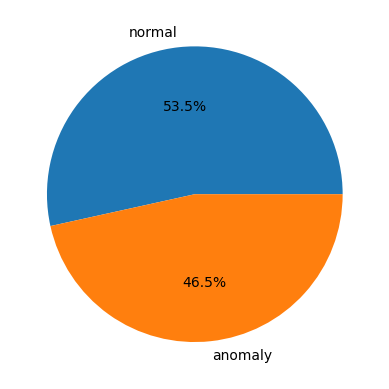

In [8]:
import numpy as np
import matplotlib.pyplot as plt

normal_count = df_train2[df_train2['class'] == 'normal'].shape[0]
non_normal_count = df_train2[df_train2['class'] != 'normal'].shape[0]

counts_dict = {'normal': normal_count, 'anomaly': non_normal_count}

plt.pie(counts_dict.values(), labels=counts_dict.keys(), autopct='%1.1f%%')
plt.show()


In [9]:
xAttack_counts = df_test2['class'].value_counts()
print('The number of normal attacks is ',xAttack_counts[0],',',round(xAttack_counts[0]/df_test2.shape[0]*100,3),'%')
print('The number of attacks is ',xAttack_counts[1],',',round(xAttack_counts[1]/df_test2.shape[0]*100,3),'%')

The number of normal attacks is  12833 , 56.924 %
The number of attacks is  9711 , 43.076 %


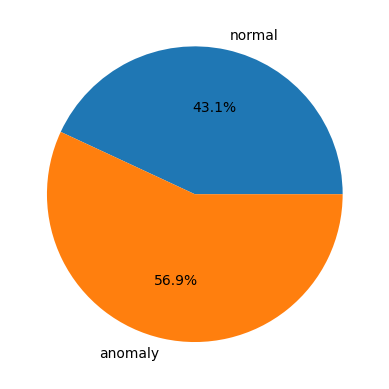

In [10]:
import numpy as np
import matplotlib.pyplot as plt

normal_count = df_test2[df_test2['class'] == 'normal'].shape[0]
non_normal_count = df_test2[df_test2['class'] != 'normal'].shape[0]

counts_dict = {'normal': normal_count, 'anomaly': non_normal_count}

plt.pie(counts_dict.values(), labels=counts_dict.keys(), autopct='%1.1f%%')
plt.show()


# III-Data Preparation
***

## 1- Overview

* We can see that most features are numeric and a few are categorical types.
* The training and testing datasets have identical variables.

We notice that num_outbound_cmds equals 0 for all the individuals of both datasets so we will drop it

## 2-Remove duplicates
***

In [11]:
print("The initial data shape :",df_train2.shape)
duplicate = df_train2[df_train2.duplicated(keep = 'last')]
print(duplicate)
print("The duplicated shape is:",duplicate.shape)

The initial data shape : (125973, 42)
       duration protocol_type service flag  src_bytes  dst_bytes  land  \
3882        0.0          icmp   eco_i   SF        8.0        0.0   0.0   
5142        0.0          icmp   ecr_i   SF        8.0        0.0   0.0   
19299       0.0          icmp   eco_i   SF        8.0        0.0   0.0   
23632       0.0          icmp   ecr_i   SF        8.0        0.0   0.0   
40577       0.0          icmp   eco_i   SF        8.0        0.0   0.0   
64513       0.0          icmp   ecr_i   SF        8.0        0.0   0.0   
72383       0.0          icmp   ecr_i   SF        8.0        0.0   0.0   
79859       0.0          icmp   ecr_i   SF        8.0        0.0   0.0   
82966       0.0          icmp   eco_i   SF        8.0        0.0   0.0   

       wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
3882              0.0     0.0  0.0                0.0        0.0   
5142              0.0     0.0  0.0                0.0        0.0   
19299            

In [12]:
df_train2 = df_train2.drop_duplicates()
df_train2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,25.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,8.0,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [13]:
print("The initial data shape :",df_test2.shape)
duplicate = df_test2[df_test2.duplicated(keep = 'last')]
print(duplicate)
print("The duplicated shape is:",duplicate.shape)

The initial data shape : (22544, 42)
       duration protocol_type service flag  src_bytes  dst_bytes  land  \
1950        0.0           tcp   other  REJ        0.0        0.0   0.0   
8788        0.0           tcp   other  REJ        0.0        0.0   0.0   
10285       0.0           tcp   other  REJ        0.0        0.0   0.0   

       wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
1950              0.0     0.0  0.0                0.0        0.0   
8788              0.0     0.0  0.0                0.0        0.0   
10285             0.0     0.0  0.0                0.0        0.0   

       num_compromised  root_shell  su_attempted  num_root  \
1950               0.0         0.0           0.0       0.0   
8788               0.0         0.0           0.0       0.0   
10285              0.0         0.0           0.0       0.0   

       num_file_creations  num_shells  num_access_files  num_outbound_cmds  \
1950                  0.0         0.0               0.0           

In [14]:
df_test2 = df_test2.drop_duplicates()
df_test2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,private,REJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,10.0,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,0.0,tcp,private,REJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,1.0,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
2,2.0,tcp,ftp_data,SF,12983.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0.0,icmp,eco_i,SF,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,65.0,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
4,1.0,tcp,telnet,RSTO,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,tcp,smtp,SF,794.0,333.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100.0,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0.0,tcp,http,SF,317.0,938.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197.0,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0.0,tcp,http,SF,54540.0,8314.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0.0,udp,domain_u,SF,42.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255.0,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


## 3-Dealing with Missing values
***

In [15]:
print('The number of missing values is:',df_train2.isnull().values.sum())
missing_percentage = df_train2.isnull().sum()*100/len(df_train2)
missing_value_df = pd.DataFrame({'missing_count': df_train2.isnull().sum(),'missing_percentage': missing_percentage})
missing=missing_value_df[missing_value_df.missing_count != 0]
print(missing)

The number of missing values is: 0
Empty DataFrame
Columns: [missing_count, missing_percentage]
Index: []


In [16]:
print('The number of missing values is:',df_test2.isnull().values.sum())
missing_percentage = df_test2.isnull().sum()*100/len(df_train2)
missing_value_df = pd.DataFrame({'missing_count': df_test2.isnull().sum(),'missing_percentage': missing_percentage})
missing=missing_value_df[missing_value_df.missing_count != 0]
print(missing)

The number of missing values is: 0
Empty DataFrame
Columns: [missing_count, missing_percentage]
Index: []


We have no missing values in both datasets

## 4-Variables Balance
***

In [17]:
def calculate_value_frequencies(df, column):
    value_frequencies = df[column].value_counts()
    total_samples = df.shape[0]

    result_df = pd.DataFrame(columns=['Rank', 'Value', 'Frequency', 'Percentage'])

    for rank, (value, frequency) in enumerate(value_frequencies.items(), start=1):
        percentage = (frequency / total_samples) * 100
        temp_df = pd.DataFrame(data={'Rank': [rank], 'Value': [value], 'Frequency': [frequency], 'Percentage': [percentage]})
        result_df = pd.concat([result_df, temp_df], ignore_index=True)

    return result_df.set_index('Rank')

def plot_histogram(df, column, x=10, y=6):
    value_frequencies = calculate_value_frequencies(df, column)
    print(value_frequencies)
    plt.figure(figsize=(x, y))
    plt.bar(value_frequencies['Value'], value_frequencies['Frequency'])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

    plt.show()

        Value Frequency  Percentage
Rank                               
1      normal     67343     53.4621
2     anomaly     58621     46.5379


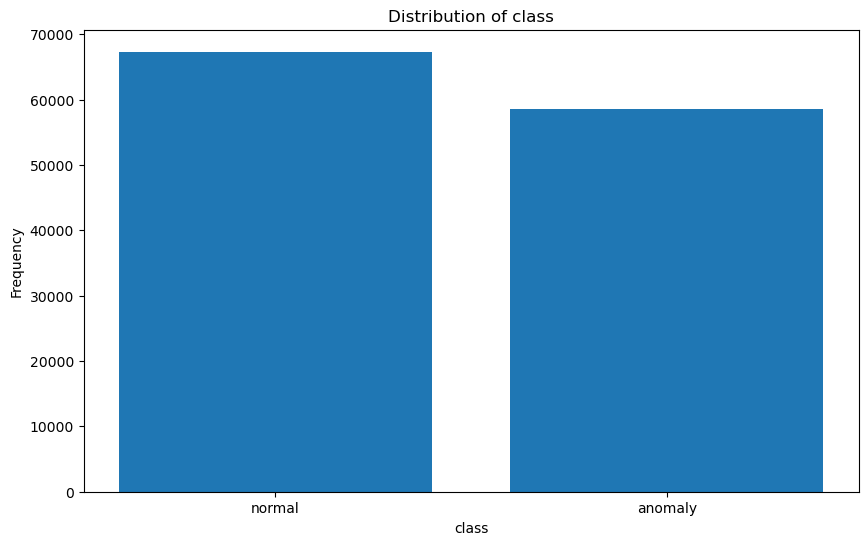

In [18]:
plot_histogram(df_train2, 'class')

There is some imbalance in the class variable but its insignificant

## 5-Visualization and Feature Relations
***

### 5.1-Categorical variables

All of the categorical variables are highly unbalanced

In [19]:
df_train2 = df_train2[df_train2['protocol_type']=='tcp']
df_test2 = df_test2[df_test2['protocol_type']=='tcp']

df_train2.drop(columns='protocol_type', axis=1, inplace=True)
df_test2.drop(columns='protocol_type', axis=1, inplace=True)

In [20]:
df_train2.keys()

Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

### 5.2-Numerical variables

We cab some outliers in the numerical variables which could help us detect the anomalities

In [21]:
print(calculate_value_frequencies(df_train2, 'urgent')) #Dropping this feature because the majority of the values (0.99) takes value 0
print(calculate_value_frequencies(df_train2, 'wrong_fragment')) #Dropping this feature because the majority of the values (0.99) takes value 0
print(calculate_value_frequencies(df_train2, 'hot')) #97.87% of values are 0
print(calculate_value_frequencies(df_train2, 'duration')) #92.04% of values are 0
print(calculate_value_frequencies(df_train2, 'src_bytes')) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset
print(calculate_value_frequencies(df_train2, 'dst_bytes')) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset
print(calculate_value_frequencies(df_train2, 'num_failed_logins')) # the majority of the values (99.9%) takes value 0
print(calculate_value_frequencies(df_train2, 'num_compromised')) #98.97% of the values are 0
print(calculate_value_frequencies(df_train2, 'num_file_creations')) #the majority of the values (99.77%) takes value 0
print(calculate_value_frequencies(df_train2, 'num_shells')) # the majority of the values (99.96%) takes value 0
print(calculate_value_frequencies(df_train2, 'num_access_files')) # the majority of the values (99.7%) takes value 0
print(calculate_value_frequencies(df_train2, 'count')) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset
print(calculate_value_frequencies(df_train2, 'srv_count')) #Other than the presence of the outliers, there isn't a presence of a value that takes over 90% of the dataset

      Value Frequency  Percentage
Rank                             
1       0.0    102680   99.991236
2       1.0         5    0.004869
3       2.0         3    0.002921
4       3.0         1    0.000974
      Value Frequency  Percentage
Rank                             
1       0.0    102689       100.0
      Value Frequency  Percentage
Rank                             
1       0.0    100018   97.398942
2       2.0      1037    1.009845
3       1.0       369    0.359337
4      28.0       277    0.269747
5      30.0       256    0.249296
6       4.0       173    0.168470
7       6.0       140    0.136334
8       5.0        76    0.074010
9      24.0        68    0.066219
10     19.0        57    0.055507
11     22.0        55    0.053560
12      3.0        54    0.052586
13     18.0        45    0.043822
14     14.0        30    0.029214
15     20.0         9    0.008764
16      7.0         5    0.004869
17     15.0         4    0.003895
18     11.0         3    0.002921
19     25.0   

In [22]:
df_train2.drop(columns=['service','flag','num_outbound_cmds','num_root','src_bytes'
    ,'dst_bytes'
    ,'urgent'
    ,'num_failed_logins'
    ,'num_compromised'
    ,'root_shell'
    ,'su_attempted'
    ,'num_root'
    ,'num_file_creations'
    ,'num_shells'
    ,'num_access_files'
    ,'is_host_login'
    ,'is_guest_login'
    ,'wrong_fragment'], axis=1, inplace=True)
df_test2.drop(columns=['service','flag','num_outbound_cmds','num_root','src_bytes'
    ,'dst_bytes'
    ,'urgent'
    ,'num_failed_logins'
    ,'num_compromised'
    ,'root_shell'
    ,'su_attempted'
    ,'num_root'
    ,'num_file_creations'
    ,'num_shells'
    ,'num_access_files'
    ,'is_host_login'
    ,'is_guest_login'
    ,'wrong_fragment'],axis=1, inplace=True)

In [23]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102689 entries, 0 to 125972
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     102689 non-null  float64
 1   land                         102689 non-null  float64
 2   hot                          102689 non-null  float64
 3   logged_in                    102689 non-null  float64
 4   count                        102689 non-null  float64
 5   srv_count                    102689 non-null  float64
 6   serror_rate                  102689 non-null  float64
 7   srv_serror_rate              102689 non-null  float64
 8   rerror_rate                  102689 non-null  float64
 9   srv_rerror_rate              102689 non-null  float64
 10  same_srv_rate                102689 non-null  float64
 11  diff_srv_rate                102689 non-null  float64
 12  srv_diff_host_rate           102689 non-null  float64
 13 

## 6-Normalization
***

We are using the MinMax Scaler due to its resilence to the outliers

In [24]:
df_train2[['land', 'logged_in']] = df_train2[['land', 'logged_in']].astype(float)
df_test2[['land', 'logged_in']] = df_test2[['land', 'logged_in']].astype(float)

df_train2['class'] = (df_train2['class'] != 'normal').astype(int)
df_test2['class'] = (df_test2['class'] != 'normal').astype(int)

df_train2 = df_train2.reset_index().drop(columns='index')
df_test2 = df_test2.reset_index().drop(columns='index')

X_train = df_train2.drop('class', axis=1)
y_train = df_train2['class']

X_test = df_test2.drop('class', axis=1)
y_test = df_test2['class']

In [25]:
d_raw_train = df_train2.copy()
d_raw_test = df_test2.copy()

d_raw_train_normal = d_raw_train[d_raw_train['class'] == 0]
X_train_normal = d_raw_train_normal.drop('class', axis=1)
y_train_normal = 0


In [26]:
d_raw_train

,duration,land,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,0.0,0.0,0.0,2.0,2.0,0.00,0.00,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0.0,0.0,0.0,0.0,123.0,6.0,1.00,1.00,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0.0,0.0,0.0,1.0,5.0,5.0,0.20,0.20,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0.0,0.0,0.0,1.0,30.0,32.0,0.00,0.00,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0.0,0.0,0.0,0.0,121.0,19.0,0.00,0.00,1.0,1.0,0.16,0.06,0.00,255.0,19.0,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.0,0.0,0.0,1.0,3.0,11.0,0.33,0.09,0.0,0.0,1.00,0.00,0.18,3.0,255.0,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,0
102685,0.0,0.0,0.0,0.0,184.0,25.0,1.00,1.00,0.0,0.0,0.14,0.06,0.00,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
102686,0.0,0.0,0.0,1.0,1.0,1.0,0.00,0.00,0.0,0.0,1.00,0.00,0.00,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0
102687,0.0,0.0,0.0,0.0,144.0,8.0,1.00,1.00,0.0,0.0,0.06,0.05,0.00,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

d_norm_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
d_norm_train['class'] = y_train

d_norm_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
d_norm_test['class'] = y_test

d_norm_train_normal = pd.DataFrame(scaler.fit_transform(X_train_normal), columns=X_train_normal.columns)
d_norm_train_normal['class'] = y_train_normal

In [28]:
d_norm_train

,duration,land,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,0.0,0.0,0.0,0.003914,0.012270,0.00,0.00,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0.0,0.0,0.0,0.0,0.240705,0.036810,1.00,1.00,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0.0,0.0,0.0,1.0,0.009785,0.030675,0.20,0.20,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0.0,0.0,0.0,1.0,0.058708,0.196319,0.00,0.00,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0.0,0.0,0.0,0.0,0.236791,0.116564,0.00,0.00,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.0,0.0,0.0,1.0,0.005871,0.067485,0.33,0.09,0.0,0.0,1.00,0.00,0.18,0.011765,1.000000,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,0
102685,0.0,0.0,0.0,0.0,0.360078,0.153374,1.00,1.00,0.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
102686,0.0,0.0,0.0,1.0,0.001957,0.006135,0.00,0.00,0.0,0.0,1.00,0.00,0.00,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0
102687,0.0,0.0,0.0,0.0,0.281800,0.049080,1.00,1.00,0.0,0.0,0.06,0.05,0.00,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1


In [29]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture

def Best_n_components(df, params_grid,model):
    #pca = PCA()
    gsv =GridSearchCV(model, params_grid)
    gsv.fit(df)
    return gsv.best_params_

def PCA_Transformation(df, dim=None):
    if dim:
        pca = PCA(dim)
        data_transformed = pca.fit_transform(df)
        return pd.DataFrame(data_transformed)
    pca = PCA()
    params = {'n_components': np.arange(1, 24)}
    n = Best_n_components(df, params,pca)['n_components']
    pca = PCA(n)
    data_transformed = pca.fit_transform(df)
    return pd.DataFrame(data_transformed), n

In [30]:
d_raw_pca_train,n = PCA_Transformation(d_raw_train)

d_raw_pca_test = PCA_Transformation(d_raw_test,n)

d_raw_pca_train_normal = PCA_Transformation(d_raw_train_normal,n)


In [31]:
d_raw_pca_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-280.874785,-8.958072,72.367754,-97.935854,-1.907527,-0.869295,0.377958,0.603257,0.029098,-0.161706,-0.536080,0.323626,-0.160210,-0.310692,0.376921,0.110450,0.029771,-0.015938,-0.083919,-0.019536,-0.015658,-0.017272,0.001431
1,-281.066607,113.912868,-10.289982,-36.658983,-2.838875,-0.462579,-0.920304,-0.382088,-0.000482,-0.052966,0.078340,-0.010397,-0.061055,0.002493,-0.021889,0.034285,-0.019063,0.011117,0.040870,-0.027999,-0.002163,0.001741,0.000495
2,-281.947532,-209.479378,38.973889,63.256562,-4.878454,-0.123315,-0.501664,-0.220089,-0.115008,-0.148152,0.068448,0.032518,0.072294,0.015893,-0.069965,-0.001699,0.152213,-0.008930,-0.007758,-0.001267,0.043931,0.015620,0.007136
3,-281.675918,-88.624841,-145.368541,9.285111,16.953845,0.273748,0.482034,0.287829,-0.017588,0.080716,-0.054238,0.024422,-0.004511,0.054458,0.015137,0.004215,0.002635,0.001979,0.021548,0.003497,-0.000555,0.002034,-0.000101
4,-281.037617,117.133243,-6.823985,-41.462611,10.396257,-0.262656,2.120027,-0.542972,0.106417,-0.211976,0.145288,-0.156049,-0.045891,-0.087020,-0.037353,0.056165,0.006334,-0.012052,-0.011093,-0.012676,0.011608,0.001980,0.001320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,-281.985591,-223.362156,60.791017,70.800890,1.706428,-0.036641,-0.546302,-0.300894,-0.056932,0.139793,0.022598,-0.019596,-0.050058,-0.025186,-0.206782,-0.107381,-0.012723,0.092248,-0.060801,-0.055738,0.234802,-0.008773,-0.093052
102685,-281.245002,151.995325,-8.389216,11.495437,14.760392,0.051768,-0.546276,-0.123723,0.018386,0.056386,-0.024263,0.020563,0.014137,0.008801,-0.002226,-0.014181,-0.000836,-0.003171,-0.007923,0.009453,0.001052,-0.002259,0.001327
102686,-280.726576,36.482334,-16.444225,-130.934175,-5.183650,-0.907767,0.250678,1.049226,0.046689,-0.186200,-0.150830,0.081694,0.218611,0.034748,-0.247329,-0.229763,-0.361060,0.130756,-0.182537,-0.061299,0.302650,0.151091,0.045561
102687,-281.059541,138.235564,0.633502,-29.353689,-0.675594,-0.399996,-0.826584,-0.222601,0.019100,-0.053509,0.036508,-0.017431,-0.031236,-0.012040,-0.028284,0.014896,-0.008213,0.006426,0.028045,-0.017655,-0.002430,0.000342,0.000675


In [32]:
d_norm_pca_train,n = PCA_Transformation(d_norm_train)
print(n)
d_norm_pca_test = PCA_Transformation(d_norm_test,n)
print(n)
d_norm_pca_train_normal = PCA_Transformation(d_raw_train_normal,n)
print(n)

23
23
23


In [33]:
d_norm_pca_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-0.450863,0.151084,0.187361,0.651138,-0.264860,0.215984,-0.493430,0.347387,-0.178257,-0.373176,-0.301433,-0.003525,0.070635,0.026858,-0.022705,-0.080021,0.010488,-0.001356,-0.014357,-0.022461,-0.015890,-0.015443,0.000377
1,1.660728,-0.431070,-0.000228,-0.097248,-0.018193,0.005647,-0.004465,-0.016630,-0.004045,-0.033104,0.061755,-0.033811,0.049379,-0.021204,0.011248,0.029958,-0.055366,-0.004965,0.013364,-0.021037,0.001356,0.004794,0.000626
2,-1.224785,-0.475136,0.294895,-0.241577,0.147024,-0.166266,-0.065956,0.029274,0.100938,0.079761,0.038585,-0.066591,0.024458,0.149433,-0.009891,-0.004872,0.003755,0.041553,0.029784,-0.021940,0.016298,-0.006567,0.006579
3,-1.209346,-0.353601,-0.525440,-0.174252,-0.151866,-0.034277,0.041257,0.032586,-0.036348,0.002918,-0.033333,0.052523,-0.015523,0.001779,0.013766,0.008221,0.011579,-0.022224,-0.016268,0.098323,0.001707,0.004489,0.000864
4,0.348847,2.041824,-0.237348,-0.147911,0.059189,0.057055,-0.201710,-0.266066,-0.006599,-0.046188,0.025637,-0.047857,0.088358,-0.008364,-0.000445,-0.007059,-0.017866,0.006871,-0.022432,0.068776,0.002342,-0.003754,0.001551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,-1.159844,-0.533898,0.511374,-0.224005,0.071339,-0.080563,0.140224,-0.001990,-0.071723,0.138800,0.101557,-0.124817,-0.069573,-0.014134,0.089880,-0.073980,-0.012709,0.218841,0.087146,0.055994,-0.009316,0.010059,-0.092385
102685,1.647341,-0.433380,-0.000374,-0.097495,-0.032410,-0.002304,0.006058,-0.006040,0.000751,0.011047,-0.025100,0.015209,-0.021473,-0.002743,0.003212,-0.013689,0.024863,-0.012386,-0.014755,0.073450,-0.002537,0.003184,0.002056
102686,-0.460370,-0.213304,-0.381720,0.764859,-0.180555,0.166016,-0.283860,0.045123,0.114945,0.266796,0.172582,0.015537,-0.194241,-0.360564,0.118072,-0.158084,-0.003492,0.308236,0.097588,0.018594,0.153575,-0.022785,0.044023
102687,1.702618,-0.409387,0.003832,-0.021859,-0.010941,0.024061,-0.033115,-0.029084,-0.008058,-0.005273,0.036801,-0.025859,0.024540,-0.009340,0.007354,0.020891,-0.034704,-0.004180,0.006441,-0.010485,0.000220,0.001662,0.000695


In [34]:
from tqdm import tqdm
from scipy.stats import norm

def FGMPM(original_data, data):
    #gmm = GaussianMixture()
    #params = {'n_components': np.arange(1, 6)}
    #n = Best_n_components(original_data, params,gmm)['n_components']
    gmm = GaussianMixture(n_components=20,random_state=0)
    gmm.fit(original_data)
    fgmpm = []
    for i in tqdm(range(len(data))):
        row_values = data.iloc[i,:]
        row_probs = []
        memberships = gmm.predict([row_values])
        means = gmm.means_[memberships[0]]
        covariances = np.sqrt(np.diag(gmm.covariances_[memberships[0]]))

        z_scores = (row_values - means) / covariances

        probs = (1 - norm.cdf(z_scores))
        row_probs.extend(probs)

        fgmpm.append(row_probs)
    return pd.DataFrame(fgmpm)

def vote_FGMPM(original_data, threshold):

    abnormal_list = (original_data > threshold).sum(axis=1)
    return abnormal_list

In [35]:
d_raw_probs_train = FGMPM(d_raw_train,d_raw_train)
d_raw_probs_test = FGMPM(d_raw_train,d_raw_test)
#normal

d_raw_probs_train_normal = FGMPM(d_raw_train_normal,d_raw_train_normal)

100%|██████████| 53600/53600 [01:02<00:00, 856.91it/s] 


In [36]:
d_raw_probs_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.522111,0.5,0.500000,0.895667,0.695773,0.695428,0.500000,0.500000,0.599183,0.599721,0.484450,0.514587,0.500000,0.480047,0.797999,0.807455,0.629104,0.587404,0.681010,5.886113e-01,0.583669,0.559955,0.595146,0.500000
1,0.500000,0.5,0.500000,0.500000,0.765675,0.781014,0.323225,0.323287,0.676717,0.676713,0.654998,0.476579,0.500000,0.500000,0.146515,0.155420,0.878343,0.566875,0.500000,3.232868e-01,0.323287,0.676713,0.676713,0.500000
2,0.675150,0.5,0.623472,0.380614,0.388670,0.555626,0.220871,0.167178,0.500000,0.500000,0.392226,0.607856,0.867900,0.883720,0.119873,0.182096,0.773573,0.603687,0.043686,3.587760e-01,0.170911,0.623299,0.256115,0.623472
3,0.500000,0.5,0.500000,0.500000,0.018060,0.064787,0.500147,0.500584,0.500000,0.500439,0.500000,0.500000,0.522961,0.133239,0.500000,0.500000,0.500000,0.701767,0.829544,5.559804e-01,0.578712,0.538307,0.550723,0.500000
4,0.500000,0.5,0.500000,0.500000,0.773520,0.113500,0.985404,0.985404,0.014593,0.014596,0.193099,0.598303,0.500000,0.500000,0.319582,0.353043,0.375025,0.566875,0.500000,9.854038e-01,0.985404,0.014596,0.014596,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.675150,0.5,0.623472,0.380614,0.541677,0.302709,0.059387,0.434692,0.500000,0.500000,0.392226,0.607856,0.765301,0.933140,0.119873,0.182096,0.773573,0.042298,0.043686,2.553846e-12,0.673807,0.623299,0.616884,0.623472
102685,0.500000,0.5,0.500000,0.500000,0.475050,0.016848,0.323225,0.323287,0.676717,0.676713,0.262238,0.598303,0.500000,0.500000,0.166456,0.155420,0.664248,0.566875,0.500000,3.232868e-01,0.323287,0.676713,0.676713,0.500000
102686,0.634979,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.073459,0.906219,0.951784,0.503396,0.690331,0.785592,4.735884e-06,0.621176,0.001695,0.518658,0.500000
102687,0.500000,0.5,0.500000,0.500000,0.674961,0.680976,0.323225,0.323287,0.676717,0.676713,0.611724,0.711119,0.500000,0.500000,0.672451,0.681300,0.878343,0.566875,0.500000,3.232868e-01,0.323287,0.676713,0.676713,0.500000


In [37]:
d_norm_probs_train = FGMPM(d_norm_train,d_norm_train)
d_norm_probs_test = FGMPM(d_norm_train,d_norm_test)
#normal
d_norm_probs_train_normal = FGMPM(d_norm_train_normal,d_norm_train_normal)

100%|██████████| 53600/53600 [00:46<00:00, 1143.26it/s]


In [38]:
d_norm_probs_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.514806,0.5,0.500000,0.500000,0.643038,0.645651,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.559578,0.424416,0.658499,0.643062,0.657413,0.603559,0.665795,0.616625,0.588179,0.462596,0.500000,0.577672
1,0.500000,0.5,0.500000,0.500000,0.830406,0.783253,0.479439,0.500000,0.500000,0.500000,0.639539,0.247091,0.500000,0.500000,0.025270,0.029227,0.928069,0.501989,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
2,0.509811,0.5,0.500000,0.500000,0.528332,0.643109,0.266607,0.266612,0.500000,0.500000,0.500000,0.500000,0.767961,0.848437,0.116546,0.230938,0.743691,0.642316,0.403119,0.051324,0.347739,0.574304,0.000017,0.500000
3,0.501544,0.5,0.500000,0.500000,0.030329,0.083574,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.491248,0.181037,0.497187,0.500000,0.500000,0.769729,0.794226,0.500000,0.500000,0.500000,0.500000,0.500000
4,0.500000,0.5,0.500000,0.500000,0.827580,0.080300,0.500000,0.500000,0.490131,0.500000,0.041139,0.774533,0.500000,0.445550,0.101367,0.146718,0.541522,0.545255,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.517427,0.5,0.608495,0.500000,0.679836,0.576523,0.202310,0.536618,0.500000,0.613946,0.500000,0.500000,0.599327,0.890307,0.364822,0.390533,0.629388,0.015746,0.163376,0.013682,0.704749,0.696792,0.723647,0.500000
102685,0.500000,0.5,0.500000,0.500000,0.533896,0.021025,0.479439,0.500000,0.500000,0.500000,0.097373,0.561126,0.500000,0.500000,0.034370,0.029227,0.713517,0.501989,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
102686,0.631862,0.5,0.537857,0.411722,0.585278,0.649057,0.570820,0.500000,0.600614,0.600614,0.429180,0.570343,0.647550,0.500000,0.709971,0.706127,0.554121,0.659704,0.500000,0.285762,0.740110,0.451390,0.641756,0.500000
102687,0.500000,0.5,0.500000,0.500000,0.744095,0.686793,0.479439,0.500000,0.500000,0.500000,0.568855,0.839236,0.500000,0.500000,0.684005,0.698014,0.928069,0.501989,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


In [39]:
d_raw_pca_probs_train = FGMPM(d_raw_pca_train,d_raw_pca_train)
d_raw_pca_probs_test = FGMPM(d_raw_pca_train,d_raw_pca_test)
#normal
d_raw_pca_probs_train_normal = FGMPM(d_raw_pca_train_normal,d_raw_pca_train_normal)

100%|██████████| 53600/53600 [00:51<00:00, 1035.71it/s]


In [40]:
d_raw_pca_probs_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.529194,0.240808,0.466281,0.774627,0.566627,0.763289,0.513403,0.379821,0.325658,0.638983,0.743368,0.267581,0.669119,0.767003,0.229872,0.459045,0.263257,0.606532,0.719954,0.609788,6.005980e-01,5.385958e-01,5.364073e-01
1,0.294188,0.802847,0.866609,0.739105,0.745942,0.795777,0.727988,0.791050,0.759626,0.508706,0.234455,0.348862,0.881413,0.321313,0.667632,0.200133,0.939135,0.088822,0.117139,0.870511,6.159326e-01,3.681835e-01,5.472306e-01
2,0.779785,0.974232,0.339136,0.028516,0.608709,0.442864,0.969368,0.918016,0.850398,0.961801,0.579041,0.437717,0.328112,0.470064,0.753395,0.647339,0.231557,0.501477,0.424457,0.547530,2.073408e-01,3.689723e-01,4.303569e-01
3,0.226519,0.094841,0.866659,0.746958,0.091963,0.074964,0.040890,0.048719,0.444687,0.165774,0.857070,0.340551,0.671904,0.149929,0.422541,0.426269,0.038651,0.406439,0.208268,0.219881,2.049161e-01,2.635335e-01,3.536333e-01
4,0.249707,0.784518,0.751505,0.764652,0.079504,0.580645,0.012574,0.920851,0.036648,0.947938,0.077493,0.906126,0.789591,0.962277,0.865417,0.069207,0.235394,0.964261,0.693732,0.682226,7.091232e-03,3.486647e-01,3.207923e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.558268,0.942672,0.452920,0.075483,0.472754,0.432483,0.773248,0.540155,0.615197,0.516486,0.598490,0.602518,0.657586,0.609009,0.858869,0.748651,0.513119,0.357371,0.645818,0.721909,1.677331e-01,5.309286e-01,7.565858e-01
102685,0.612081,0.536485,0.808939,0.432906,0.018262,0.218756,0.601270,0.438542,0.604312,0.139893,0.635064,0.226339,0.245839,0.266964,0.337016,0.718286,0.467835,0.724015,0.656528,0.318530,3.644299e-01,7.046593e-01,3.189944e-01
102686,0.527738,0.033240,0.714042,0.968766,0.578394,0.946557,0.256632,0.128303,0.076631,0.742220,0.832459,0.165184,0.086804,0.446088,0.935789,0.999554,0.999999,0.000010,0.999380,0.811518,4.420098e-08,1.609688e-07,1.607082e-07
102687,0.283015,0.642919,0.401800,0.697691,0.626805,0.736170,0.698124,0.584939,0.597873,0.510891,0.386602,0.379792,0.670245,0.460148,0.761494,0.392229,0.718475,0.238805,0.220395,0.753863,6.361049e-01,4.876636e-01,4.964854e-01


In [41]:
d_norm_pca_probs_train = FGMPM(d_norm_pca_train,d_norm_pca_train)
d_norm_pca_probs_test = FGMPM(d_norm_pca_train,d_norm_pca_test)
#normal
d_norm_pca_probs_train_normal = FGMPM(d_norm_pca_train_normal,d_norm_pca_train_normal)

100%|██████████| 53600/53600 [00:47<00:00, 1137.67it/s]


In [42]:
d_norm_pca_probs_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.408652,0.172832,0.602141,0.332930,0.446892,0.320377,0.692923,0.622018,0.438560,0.524049,0.440569,0.521128,0.215123,0.349512,0.784920,0.706230,0.440033,0.545006,0.624373,0.694975,0.661317,0.794368,0.620834
1,0.896111,0.945123,0.357381,0.951363,0.724548,0.501655,0.359252,0.774422,0.318423,0.924869,0.123903,0.882754,0.117669,0.921665,0.035481,0.093758,0.895872,0.541930,0.116463,0.691807,0.275348,0.048013,0.569056
2,0.630375,0.735839,0.460074,0.616533,0.233085,0.799590,0.738564,0.548627,0.180003,0.285519,0.358289,0.640251,0.392439,0.335452,0.680695,0.395686,0.376957,0.500561,0.437867,0.770427,0.497535,0.865979,0.463812
3,0.327253,0.461858,0.742395,0.907105,0.275357,0.505676,0.481931,0.521278,0.891696,0.232199,0.932012,0.072027,0.940093,0.079378,0.237503,0.915653,0.069330,0.874718,0.885586,0.120794,0.557120,0.151817,0.144824
4,0.968708,0.964350,0.092969,0.711928,0.945576,0.237176,0.503828,0.606110,0.071553,0.821189,0.257564,0.697946,0.231309,0.815394,0.397999,0.663925,0.589086,0.904115,0.949575,0.042226,0.925067,0.263335,0.319007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.529620,0.860361,0.258021,0.583723,0.368050,0.668700,0.326766,0.620103,0.512059,0.187940,0.206154,0.760663,0.908654,0.751227,0.241264,0.882276,0.520996,0.069785,0.131149,0.434502,0.639811,0.313659,0.869809
102685,0.949982,0.960158,0.360311,0.952085,0.794233,0.680021,0.136015,0.348815,0.284782,0.604875,0.561957,0.312901,0.541304,0.577368,0.508912,0.870370,0.264951,0.972772,0.959684,0.022828,0.887904,0.172492,0.165219
102686,0.173433,0.743879,0.755232,0.343219,0.822800,0.435120,0.741368,0.278586,0.593533,0.293761,0.144772,0.426727,0.841719,0.888600,0.031262,0.920298,0.638690,0.023337,0.101950,0.142727,0.016349,0.760976,0.056504
102687,0.521943,0.564055,0.279759,0.292458,0.685011,0.142403,0.950394,0.981988,0.347795,0.757862,0.218034,0.820408,0.231375,0.736171,0.178833,0.209021,0.780098,0.465313,0.319496,0.587782,0.472857,0.396269,0.547323


# IV-Modelling
***

# <span style="font-size:35px; color:yellow"> Unsupervised </span>

In [43]:
!pip install kneed

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
from kneed import KneeLocator
from sklearn.svm import OneClassSVM, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [45]:
def Vote(original_data,test_data ,min_abnormals = 11, threshold = 0.5):
    threshold_values = original_data.quantile(q=threshold, axis=0)
    threshold_vector = threshold_values.values.flatten()
    N_list = vote_FGMPM(test_data,threshold_vector)
    Y_list = [1 if N >= min_abnormals else 0 for N in N_list]
    Y_array = np.array(Y_list)
    return Y_array

In [46]:
def count_predict(predict_values):
    unique, counts = np.unique(predict_values, return_counts=True)
    return(dict(zip(unique, counts)))

In [47]:
def ElbowMethod(df,K):
    wcss=[]
    for k in range(1,K):
        kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    k = KneeLocator(range(1, K), wcss, curve="convex", direction="decreasing")

    k.plot_knee()
    plt.plot(range(1,K), wcss, 'bx-')
    plt.title('The Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('wcss')
    plt.show()

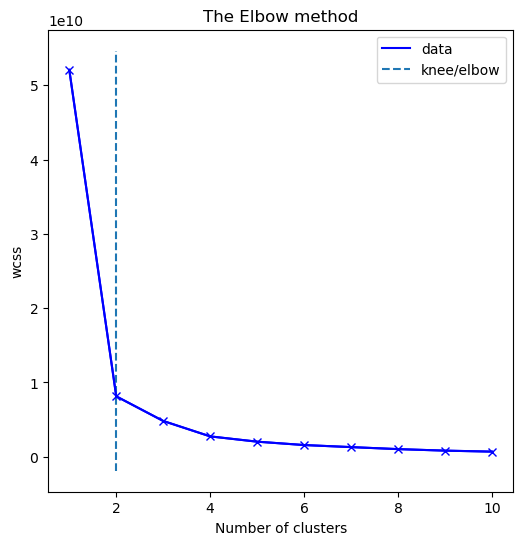

In [48]:
ElbowMethod(d_raw_train_normal,11)

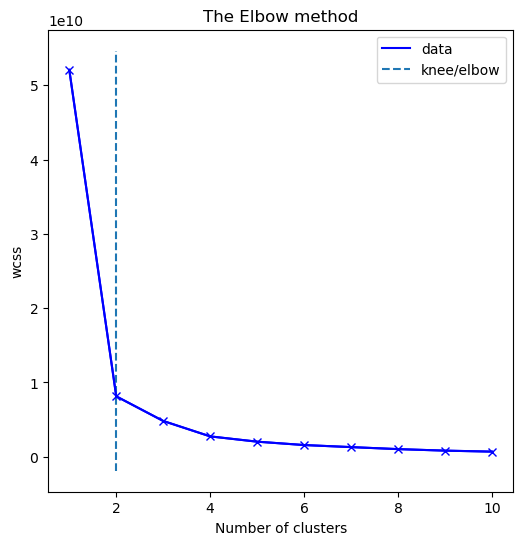

In [49]:
ElbowMethod(d_raw_pca_train_normal,11)

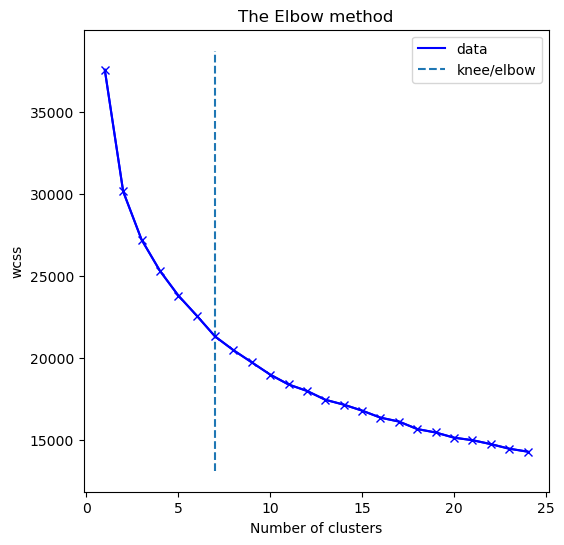

In [50]:
ElbowMethod(d_raw_probs_train_normal,25)

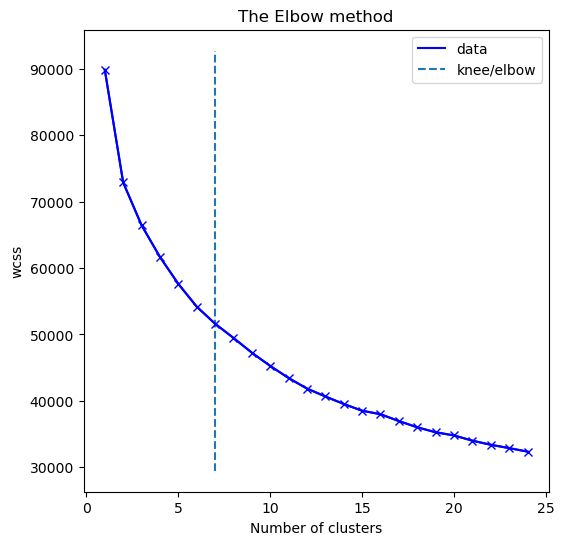

In [51]:
ElbowMethod(d_raw_pca_probs_train_normal,25)

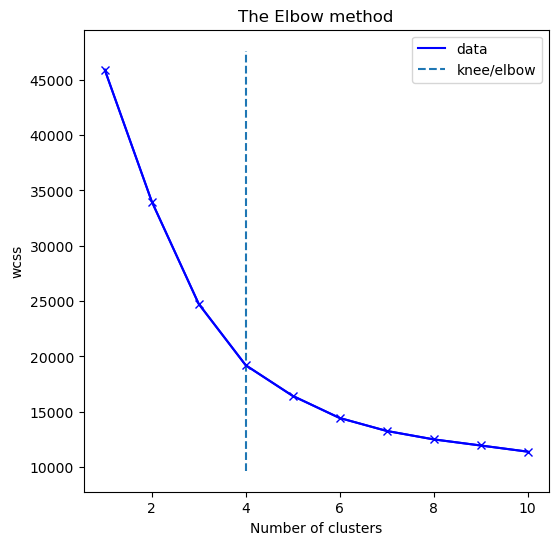

In [52]:
ElbowMethod(d_norm_train_normal,11)

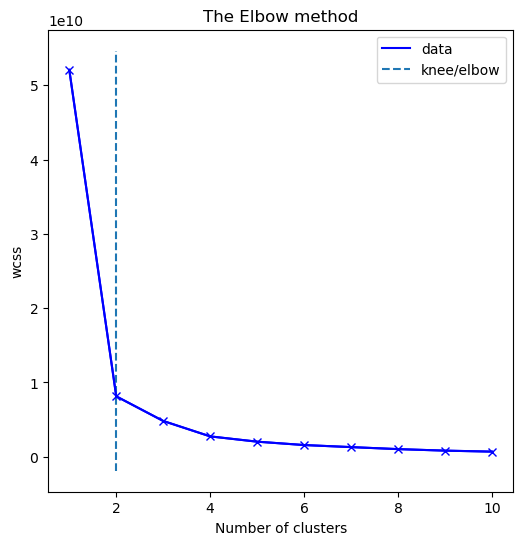

In [53]:
ElbowMethod(d_norm_pca_train_normal,11)

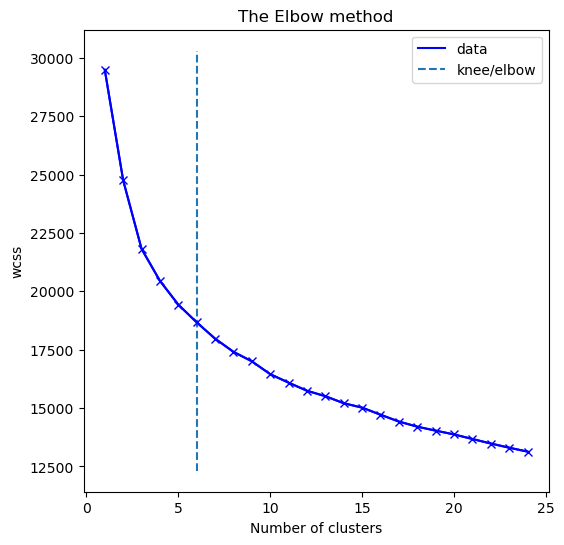

In [54]:
ElbowMethod(d_norm_probs_train_normal,25)

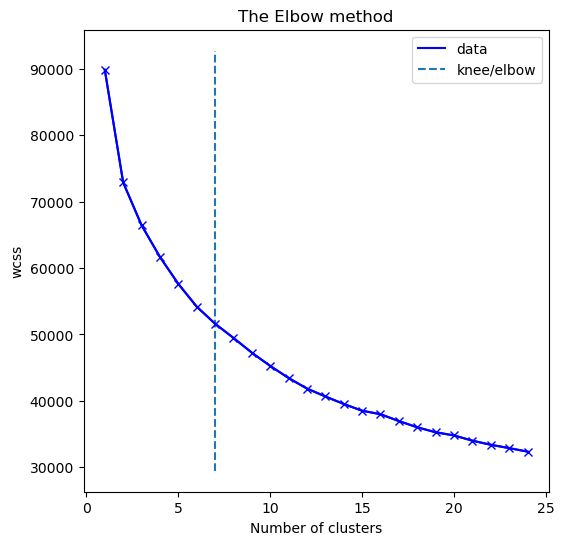

In [55]:
ElbowMethod(d_norm_pca_probs_train_normal,25)

In [56]:
def KMeansD(train_data, test_data, k,threshold=75):
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(train_data)
    centroids = kmeans.cluster_centers_

    #calculate the distances between centroids and the data
    distances = pairwise_distances(train_data, centroids)
    #Selecting the maximum distance between a centroid and an observation for each cluster
    trh = np.percentile(distances,threshold , axis=0)
    distances_test = pairwise_distances(test_data, centroids)

    # Identify anomalies based on distances
    # Assuming anomalies have larger distances than normal data
    predicted = np.any(distances_test > trh, axis=1).astype(int)
    return predicted

In [57]:
def SVMAD(train_data, test_data,nusvm=0.1,kernelsvm='rbf',gammasvm='auto'):
    clf = OneClassSVM(nu=nusvm,kernel=kernelsvm, gamma=gammasvm).fit(train_data)

    predictions = clf.predict(test_data)

    predictions = [1 if i == -1 else 0 for i in predictions]

    return predictions

In [58]:
def KMeansC(train_data, test_data):
    kmeans = KMeans(n_clusters=2, init='k-means++',random_state=0)
    kmeans.fit(train_data)
    predictions = kmeans.predict(test_data)
    return predictions

In [59]:
def SVMC(train_data, test_data, Csvm = 1.0, kernelsvm = 'rbf', gammasvm = 'scale'):

    model = SVC(C=Csvm, kernel=kernelsvm, gamma=gammasvm)
    model.fit(X=train_data,y=y_train)

    predictions = model.predict(test_data)

    return predictions

In [60]:
def DTC(train_data,test_data):
#     params_grid = {'criterion': ['gini', 'entropy'],
#      'splitter': ['best', 'random','auto'],
#      'max_depth': [2*n for n in np.arange(1,10)],
#      'max_features': ['sqrt','log2','auto'],
#      'min_samples_leaf': [1, 2, 4],
#      'min_samples_split': [2, 5, 10]}
    tree = DecisionTreeClassifier()
#     tree_cv = GridSearchCV(tree, params_grid, cv=5)
#     tree_cv.fit(train_data,Y_train_enc)
#     tree = DecisionTreeClassifier(**tree_cv.best_params_)
    tree.fit(train_data, y_train)
    predictions = tree.predict(test_data)
    return predictions

In [61]:
def MLP(train_data,test_data):
    mlp = MLPClassifier(max_iter=100)
#     parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],}
#     clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
    mlp.fit(train_data, y_train)
    predictions = mlp.predict(test_data)
    return predictions

## Voting phase

### Voting

In [53]:
Y_predv_e1 = '-'
Y_predv_e3 = '-'
Y_predv_e5 = '-'
Y_predv_e7 = '-'

We are not using Voting model for non FGMPM

In [54]:
Y_predv_e2 = Vote(d_norm_probs_train_normal, d_norm_probs_test,min_abnormals = 5, threshold = 0.82)
Y_predv_e4 = Vote(d_norm_pca_probs_train_normal, d_norm_pca_probs_test,min_abnormals = 5, threshold = 0.78)
Y_predv_e6 = Vote(d_raw_probs_train_normal, d_raw_probs_test,min_abnormals = 5, threshold = 0.87)
Y_predv_e8 = Vote(d_raw_pca_probs_train_normal, d_raw_pca_probs_test,min_abnormals = 5, threshold = 0.88)

### KMeans-D

In [55]:
Y_predkd_e1 = KMeansD(d_norm_train_normal,d_norm_test,4,threshold=85)
Y_predkd_e2 = KMeansD(d_norm_probs_train_normal,d_norm_probs_test,7,threshold=85)
Y_predkd_e3 = KMeansD(d_norm_pca_train_normal,d_norm_pca_test,3,threshold=10)
Y_predkd_e4 = KMeansD(d_norm_pca_probs_train_normal,d_norm_pca_probs_test,8,threshold=55)
Y_predkd_e5 = KMeansD(d_raw_train_normal,d_raw_test,2,threshold=85)
Y_predkd_e6 = KMeansD(d_raw_probs_train_normal,d_raw_probs_test,10,threshold=85)
Y_predkd_e7 = KMeansD(d_raw_pca_train_normal,d_raw_pca_test,2,threshold=99.98)
Y_predkd_e8 = KMeansD(d_raw_pca_probs_train_normal,d_raw_pca_probs_test,10,threshold=85)

### SVM-1

In [56]:
Y_preds1_e1 = SVMAD(d_norm_train_normal,d_norm_test,nusvm=0.3)
Y_preds1_e2 = SVMAD(d_norm_probs_train_normal,d_norm_probs_test,nusvm=0.4)
Y_preds1_e3 = SVMAD(d_norm_pca_train_normal,d_norm_pca_test,kernelsvm='sigmoid',nusvm=0.75)
Y_preds1_e4 = SVMAD(d_norm_pca_probs_train_normal,d_norm_pca_probs_test,nusvm=0.5)
Y_preds1_e5 = SVMAD(d_raw_train_normal,d_raw_test,nusvm=0.01)
Y_preds1_e6 = SVMAD(d_raw_probs_train_normal,d_raw_probs_test,nusvm=0.3)
Y_preds1_e7 = SVMAD(d_raw_pca_train_normal,d_raw_pca_test,kernelsvm='sigmoid',nusvm=0.55)
Y_preds1_e8 = SVMAD(d_raw_pca_probs_train_normal,d_raw_pca_probs_test,nusvm=0.15)

In [57]:
count_predict(SVMAD(d_raw_pca_probs_train_normal,d_raw_pca_probs_test,nusvm=0.25))

{0: 17639, 1: 1238}

In [58]:
Y_predkc_e1 = KMeansC(d_norm_train,d_norm_test)
Y_predkc_e2 = KMeansC(d_norm_probs_train,d_norm_probs_test)
Y_predkc_e3 = KMeansC(d_norm_pca_train,d_norm_pca_test)
Y_predkc_e4 = KMeansC(d_norm_pca_probs_train,d_norm_pca_probs_test)
Y_predkc_e5 = KMeansC(d_raw_train,d_raw_test)
Y_predkc_e6 = KMeansC(d_raw_probs_train,d_raw_probs_test)
Y_predkc_e7 = KMeansC(d_raw_pca_train,d_raw_pca_test)
Y_predkc_e8 = KMeansC(d_raw_pca_probs_train,d_raw_pca_probs_test)

In [59]:
Y_preds2_e1 = SVMC(d_norm_train,d_norm_test)
Y_preds2_e2 = SVMC(d_norm_probs_train,d_norm_probs_test)
Y_preds2_e3 = SVMC(d_norm_pca_train,d_norm_pca_test)
Y_preds2_e4 = SVMC(d_norm_pca_probs_train,d_norm_pca_probs_test)
Y_preds2_e5 = SVMC(d_raw_train,d_raw_test)
Y_preds2_e6 = SVMC(d_raw_probs_train,d_raw_probs_test)
Y_preds2_e7 = SVMC(d_raw_pca_train,d_raw_pca_test)
Y_preds2_e8 = SVMC(d_raw_pca_probs_train,d_raw_pca_probs_test)

In [60]:
Y_preddt_e1 = DTC(d_norm_train,d_norm_test)
Y_preddt_e2 = DTC(d_norm_probs_train,d_norm_probs_test)
Y_preddt_e3 = DTC(d_norm_pca_train,d_norm_pca_test)
Y_preddt_e4 = DTC(d_norm_pca_probs_train,d_norm_pca_probs_test)
Y_preddt_e5 = DTC(d_raw_train,d_raw_test)
Y_preddt_e6 = DTC(d_raw_probs_train,d_raw_probs_test)
Y_preddt_e7 = DTC(d_raw_pca_train,d_raw_pca_test)
Y_preddt_e8 = DTC(d_raw_pca_probs_train,d_raw_pca_probs_test)

In [61]:
Y_predml_e1 = MLP(d_norm_train,d_norm_test)
Y_predml_e2 = MLP(d_norm_probs_train,d_norm_probs_test)
Y_predml_e3 = MLP(d_norm_pca_train,d_norm_pca_test)
Y_predml_e4 = MLP(d_norm_pca_probs_train,d_norm_pca_probs_test)
Y_predml_e5 = MLP(d_raw_train,d_raw_test)
Y_predml_e6 = MLP(d_raw_probs_train,d_raw_probs_test)
Y_predml_e7 = MLP(d_raw_pca_train,d_raw_pca_test)
Y_predml_e8 = MLP(d_raw_pca_probs_train,d_raw_pca_probs_test)

# V-Evaluation
***

# <span style="font-size:35px; color:yellow"> Unsupervised </span>

In [62]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [63]:
liste1 = [Y_predv_e1,Y_predkd_e1,Y_preds1_e1,Y_predkc_e1,Y_preds2_e1,Y_preddt_e1,Y_predml_e1]
liste2 = [Y_predv_e2,Y_predkd_e2,Y_preds1_e2,Y_predkc_e2,Y_preds2_e2,Y_preddt_e2,Y_predml_e2]
liste3 = [Y_predv_e3,Y_predkd_e3,Y_preds1_e3,Y_predkc_e3,Y_preds2_e3,Y_preddt_e3,Y_predml_e3]
liste4 = [Y_predv_e4,Y_predkd_e4,Y_preds1_e4,Y_predkc_e4,Y_preds2_e4,Y_preddt_e4,Y_predml_e4]
liste5 = [Y_predv_e5,Y_predkd_e5,Y_preds1_e5,Y_predkc_e5,Y_preds2_e5,Y_preddt_e5,Y_predml_e5]
liste6 = [Y_predv_e6,Y_predkd_e6,Y_preds1_e6,Y_predkc_e6,Y_preds2_e6,Y_preddt_e6,Y_predml_e6]
liste7 = [Y_predv_e7,Y_predkd_e7,Y_preds1_e7,Y_predkc_e7,Y_preds2_e7,Y_preddt_e7,Y_predml_e7]
liste8 = [Y_predv_e8,Y_predkd_e8,Y_preds1_e8,Y_predkc_e8,Y_preds2_e8,Y_preddt_e8,Y_predml_e8]

In [64]:
def total_count():
    listmodels = ['Voting', 'KM-D','SVM-1','KM-C','SVM-2','DT','MLP' ]

    for i,x in enumerate(listmodels):
        print(x)
        print(count_predict(liste1[i]))
        print(count_predict(liste2[i]))
        print(count_predict(liste3[i]))
        print(count_predict(liste4[i]))
        print(count_predict(liste5[i]))
        print(count_predict(liste6[i]))
        print(count_predict(liste7[i]))
        print(count_predict(liste8[i]))

In [65]:
total_count()

Voting
{'-': 1}
{0: 3333, 1: 15544}
{'-': 1}
{0: 12846, 1: 6031}
{'-': 1}
{0: 6874, 1: 12003}
{'-': 1}
{0: 16909, 1: 1968}
KM-D
{0: 6606, 1: 12271}
{0: 6935, 1: 11942}
{0: 7760, 1: 11117}
{0: 12619, 1: 6258}
{0: 7832, 1: 11045}
{0: 6154, 1: 12723}
{0: 1735, 1: 17142}
{0: 17492, 1: 1385}
SVM-1
{0: 6551, 1: 12326}
{0: 6589, 1: 12288}
{0: 9862, 1: 9015}
{0: 15778, 1: 3099}
{0: 6912, 1: 11965}
{0: 7776, 1: 11101}
{0: 16910, 1: 1967}
{0: 18400, 1: 477}
KM-C
{0: 7009, 1: 11868}
{0: 10886, 1: 7991}
{0: 11207, 1: 7670}
{0: 14510, 1: 4367}
{0: 18869, 1: 8}
{0: 5587, 1: 13290}
{0: 18869, 1: 8}
{0: 9881, 1: 8996}
SVM-2
{0: 7842, 1: 11035}
{0: 7957, 1: 10920}
{0: 10881, 1: 7996}
{0: 12004, 1: 6873}
{0: 12454, 1: 6423}
{0: 8038, 1: 10839}
{0: 12142, 1: 6735}
{0: 12617, 1: 6260}
DT
{0: 7842, 1: 11035}
{0: 7963, 1: 10914}
{0: 11323, 1: 7554}
{0: 12423, 1: 6454}
{0: 7842, 1: 11035}
{0: 7997, 1: 10880}
{0: 10960, 1: 7917}
{0: 15693, 1: 3184}
MLP
{0: 7842, 1: 11035}
{0: 7895, 1: 10982}
{0: 10618, 1: 825

In [66]:
def tab_f1_score(Y_test):
    f1_score1 = []
    f1_score2 = []
    f1_score3 = []
    f1_score4 = []
    f1_score5 = []
    f1_score6 = []
    f1_score7 = []
    f1_score8 = []
    for i in np.arange(7):
        if liste1[i] != '-':
            f1_score1.append(f1_score(Y_test,liste1[i]))
        else:
            f1_score1.append('-')
        f1_score2.append(f1_score(Y_test,liste2[i]))
        if liste3[i] != '-':
            f1_score3.append(f1_score(Y_test,liste3[i]))
        else:
            f1_score3.append('-')
        f1_score4.append(f1_score(Y_test,liste4[i]))
        if liste5[i] != '-':
            f1_score5.append(f1_score(Y_test,liste5[i]))
        else:
            f1_score5.append('-')
        f1_score6.append(f1_score(Y_test,liste6[i]))
        if liste7[i] != '-':
            f1_score7.append(f1_score(Y_test,liste7[i]))
        else:
            f1_score7.append('-')
        f1_score8.append(f1_score(Y_test,liste8[i]))
    listmodels = ['Voting', 'KM-D','SVM-1','KM-C','SVM-2','DT','MLP' ]
    dictdf = {'Models' : listmodels, 'E1': f1_score1 ,'E2': f1_score2, 'E3': f1_score3, 'E4': f1_score4, 'E5': f1_score5,
             'E6': f1_score6, 'E7': f1_score7 , 'E8': f1_score8}
    df = pd.DataFrame(dictdf)
    return df

In [67]:
def Sensitivity(Y_test):
    recalle1 = []
    recalle2 = []
    recalle3 = []
    recalle4 = []
    recalle5 = []
    recalle6 = []
    recalle7 = []
    recalle8 = []
    for i in np.arange(7):
        if liste1[i] != '-':
            recalle1.append(recall_score(Y_test,liste1[i]))
        else:
            recalle1.append('-')
        recalle2.append(recall_score(Y_test,liste2[i]))
        if liste3[i] != '-':
            recalle3.append(recall_score(Y_test,liste3[i]))
        else:
            recalle3.append('-')
        recalle4.append(recall_score(Y_test,liste4[i]))
        if liste5[i] != '-':
            recalle5.append(recall_score(Y_test,liste5[i]))
        else:
            recalle5.append('-')
        recalle6.append(recall_score(Y_test,liste6[i]))
        if liste7[i] != '-':
            recalle7.append(recall_score(Y_test,liste7[i]))
        else:
            recalle7.append('-')
        recalle8.append(recall_score(Y_test,liste8[i]))
    listmodels = ['Voting', 'KM-D','SVM-1','KM-C','SVM-2','DT','MLP' ]
    dictdf = {'Models' : listmodels, 'E1': recalle1 ,'E2': recalle2, 'E3': recalle3, 'E4': recalle4, 'E5': recalle5,
             'E6': recalle6, 'E7': recalle7 , 'E8': recalle8}
    df = pd.DataFrame(dictdf)
    return df

In [68]:
def cap_score(y_test,y_pred):
    cf_matirx = confusion_matrix(y_test,y_pred)
    true_positives = cf_matirx[1, 1]
    false_positives = cf_matirx[0, 1]
    true_negatives = cf_matirx[0, 0]
    false_negatives = cf_matirx[1, 0]
    ppv = true_positives/(true_positives+false_positives)
    npv = true_negatives/(true_negatives+false_negatives)
    B = y_test.value_counts()[0]/len(y_test)
    cap = B*(ppv*npv)/(ppv+npv)
    return cap

In [69]:
y_test.value_counts()[0]

7842

In [70]:
def CAP(Y_test):
    cap1 = []
    cap2 = []
    cap3 = []
    cap4 = []
    cap5 = []
    cap6 = []
    cap7 = []
    cap8 = []
    for i in np.arange(7):
        if liste1[i] != '-':
            cap1.append(cap_score(Y_test,liste1[i]))
        else:
            cap1.append('-')
        cap2.append(cap_score(Y_test,liste2[i]))
        if liste3[i] != '-':
            cap3.append(cap_score(Y_test,liste3[i]))
        else:
            cap3.append('-')
        cap4.append(cap_score(Y_test,liste4[i]))
        if liste5[i] != '-':
            cap5.append(cap_score(Y_test,liste5[i]))
        else:
            cap5.append('-')
        cap6.append(cap_score(Y_test,liste6[i]))
        if liste7[i] != '-':
            cap7.append(cap_score(Y_test,liste7[i]))
        else:
            cap7.append('-')
        cap8.append(cap_score(Y_test,liste8[i]))
    listmodels = ['Voting', 'KM-D','SVM-1','KM-C','SVM-2','DT','MLP' ]
    dictdf = {'Models' : listmodels, 'E1': cap1 ,'E2': cap2, 'E3': cap3, 'E4': cap4, 'E5': cap5,
             'E6': cap6, 'E7': cap7 , 'E8': cap8}
    df = pd.DataFrame(dictdf)
    return df

In [71]:
tab_f1_score(y_test)

,Models,E1,E2,E3,E4,E5,E6,E7,E8
0,Voting,-,0.650739,-,0.514239,-,0.889834,-,0.265323
1,KM-D,0.946966,0.698351,0.941134,0.554791,0.796105,0.827763,0.662384,0.194847
2,SVM-1,0.944737,0.765425,0.884589,0.368332,0.870957,0.872154,0.296262,0.073489
3,KM-C,0.353142,0.530537,0.809302,0.552006,0.000181,0.458047,0.000181,0.851880
4,SVM-2,1.0,0.994124,0.812044,0.706277,0.710963,0.991040,0.72009,0.559584
5,DT,1.0,0.994214,0.789392,0.692550,1.0,0.992927,0.774694,0.250369
6,MLP,1.0,0.996684,0.818389,0.754300,0.976219,0.998912,0.77066,0.569330


In [72]:
Sensitivity(y_test)

,Models,E1,E2,E3,E4,E5,E6,E7,E8
0,Voting,-,0.783688,-,0.397644,-,0.928863,-,0.156321
1,KM-D,1.0,0.727050,0.944631,0.434708,0.796466,0.891074,0.845673,0.109651
2,SVM-1,1.0,0.808881,0.803625,0.235886,0.907657,0.874762,0.174536,0.038333
3,KM-C,0.36647,0.457363,0.685908,0.385229,0.000091,0.504848,0.000091,0.773176
4,SVM-2,1.0,0.988944,0.700227,0.573086,0.562392,0.982238,0.579792,0.438514
5,DT,1.0,0.988763,0.664884,0.548799,1.0,0.985954,0.665247,0.161305
6,MLP,1.0,0.994291,0.715451,0.661713,0.956049,0.998006,0.684096,0.445945


In [73]:
CAP(y_test)

,Models,E1,E2,E3,E4,E5,E6,E7,E8
0,Voting,-,0.078078,-,0.120529,-,0.180624,-,0.123417
1,KM-D,0.196697,0.127578,0.193047,0.126571,0.156248,0.163770,0.007411,0.121254
2,SVM-1,0.196234,0.145896,0.180762,0.124439,0.17547,0.175571,0.13027,0.119024
3,KM-C,0.001059,0.109154,0.168798,0.142986,0.039913,0.008689,0.039913,0.173554
4,SVM-2,0.207713,0.206043,0.168078,0.152016,0.155691,0.205149,0.15556,0.127486
5,DT,0.207713,0.206055,0.165208,0.151916,0.207713,0.205680,0.160591,0.098295
6,MLP,0.207713,0.206787,0.168461,0.154562,0.201192,0.207403,0.157155,0.129436


## Interpretation:
On Average A Non supervised model with normal data training is performing better than others as expected.

The best results achieved are from KMeans-D from e3 and e1 (d_norm_pca and d_norm) with 0.913 and 0.88 followed by One Class SVM and GMM with f1-score between 0.849 and 0.841 Although SVM-1 did not really perform  on e7.

KM-C is struggling with 2 datasets that results in very low f1_score and it is doing worse on average than other non supervised.

MLP is doing well except for e4 and e8 since the sensitivity is lower than 0.5 (it looks like it doesn't perform well when we apply PCA and FGMPM at the same time)

The same thing could be applied for DT but it have a bit worse f1-score and sensitivty in average.

Although MLP and Decision Tree results are acceptable, keep in mind to train them we need to have both normal and anomaly data